In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from bs4 import BeautifulSoup


In [6]:
url = "https://covid19.ncdc.gov.ng"
page_web = requests.get(url).text
soup= BeautifulSoup(page_web, 'lxml')

In [31]:
content_table = soup.find('table', id = 'custom1')

#getting table header name

table_headers = content_table.thead.findAll("tr")
for k in range(len(table_headers)):
  data = table_headers[k].findAll("th")
  column_names = [j.string.strip() for j in data]

print(len(column_names))

5


In [28]:
values =[]
keys = []
table_data = content_table.tbody.findAll("tr")
for k in range(len(table_data)):
    key = table_data[k].findAll("td")[0].string.strip()
    keys.append(keys)
    value = [j.string.strip() for j in table_data[k].find_all("td")]
    values.append(value)
    data_dict = dict(enumerate(values))

#creating dataframe


37

In [34]:
df = pd.DataFrame(data_dict)
df= df.T
df.columns = column_names

df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"12,427","10,358","1,897",172
1,FCT,"2,576","1,765",773,38
2,Edo,"1,731",700,974,57
3,Oyo,"1,726",699,"1,008",19
4,Rivers,"1,368",469,853,46
5,Delta,"1,359",745,583,31
6,Kano,"1,309",227,"1,030",52
7,Ogun,"1,087",329,736,22
8,Kaduna,989,336,641,12
9,Ondo,716,557,138,21


In [50]:
#df['No. of Cases (Lab Confirmed)'] = df['No. of Cases (Lab Confirmed)'].apply(lambda x: int(re.sub("[^0-9]", "", x)))
#df['No. of Cases (on admission)'] = df['No. of Cases (on admission)'].apply(lambda x: int(re.sub("[^0-9]", "", x)))
df['No. Discharged'] = df['No. Discharged'].apply(lambda x: int(re.sub("[^0-9]", "", x)))
#df['No. of Deaths'] = df['No. of Deaths'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [51]:
df.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)     int64
No. of Cases (on admission)      int64
No. Discharged                   int64
No. of Deaths                    int64
No. Discharged)                  int64
dtype: object

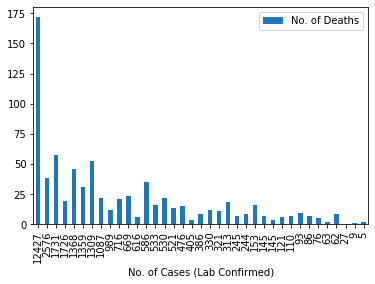

In [56]:
df.plot(kind='bar', x ='No. of Cases (Lab Confirmed)', y = 'No. of Deaths')
plt.show()

In [57]:
count, bin_edges = np.histogram(df['No. of Cases (Lab Confirmed)'])

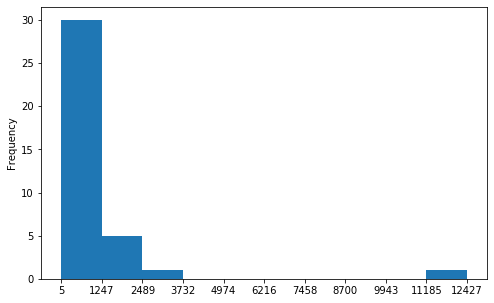

In [58]:
df['No. of Cases (Lab Confirmed)'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)